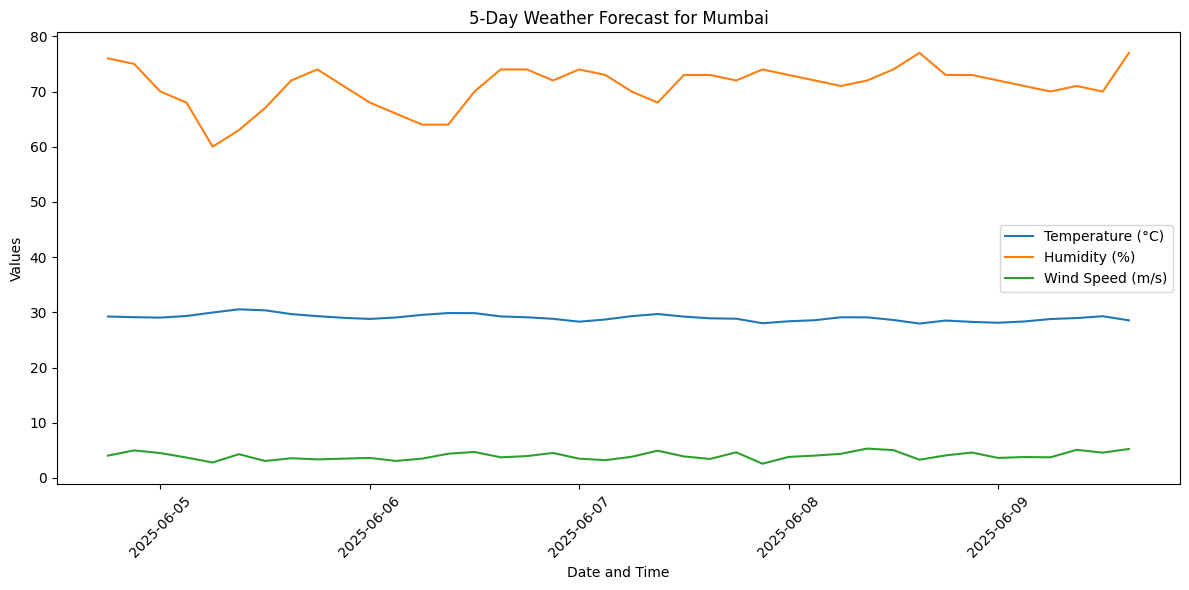

In [2]:
#Task 1 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
API_KEY = "6ad6a7037df9c0e945d82b80af0bfa3c"
CITY = "Mumbai"
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"


# Fetch data
response = requests.get(URL)
data = response.json()

# Extract relevant data
forecast_list = data['list']
df = pd.DataFrame([{
    'datetime': item['dt_txt'],
    'temp': item['main']['temp'],
    'humidity': item['main']['humidity'],
    'wind_speed': item['wind']['speed']
} for item in forecast_list])

df['datetime'] = pd.to_datetime(df['datetime'])

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='datetime', y='temp', label='Temperature (°C)')
sns.lineplot(data=df, x='datetime', y='humidity', label='Humidity (%)')
sns.lineplot(data=df, x='datetime', y='wind_speed', label='Wind Speed (m/s)')
plt.title(f"5-Day Weather Forecast for {CITY}")
plt.xlabel("Date and Time")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()